In [5]:
import pandas as pd

data= pd.read_csv('data/tradeoff_data-v3-incr-100-score_new_rkl.csv', header=0)

In [125]:
data.head()

,iterations,premium_ratio,premium_seller_num,mean_price,std_price,mean_delivery_time,std_delivery_time,mean_fair_price,std_fair_price,mean_fair_delivery_time,...,mean_baseline_rkl_5,std_baseline_rkl_5,mean_baseline_rkl_10,std_baseline_rkl_10,premium_winners,non_premium_winners,fair_premium_winners,fair_non_premium_winners,baseline_premium_winners,baseline_non_premium_winners
0,0,0.10,100.0,0.816458,0.001982,0.801739,0.004348,0.466484,0.000492,0.613678,...,0.153191,0.002216,0.039393,0.001773,537.0,462.0,140.0,859.0,96.0,903.0
1,1,0.13,130.0,0.802566,0.003719,0.785677,0.002536,0.479777,0.005490,0.647845,...,0.101973,0.005141,0.021688,0.000650,657.0,343.0,124.0,876.0,158.0,842.0
2,2,0.16,160.0,0.798834,0.003904,0.774352,0.001151,0.474696,0.001274,0.605455,...,0.106104,0.003705,0.022598,0.002304,654.0,346.0,209.0,791.0,174.0,826.0
3,3,0.19,190.0,0.817180,0.000109,0.827094,0.002487,0.447620,0.003267,0.642969,...,0.099170,0.002013,0.022048,0.000558,577.0,423.0,226.0,774.0,147.0,853.0
4,4,0.22,220.0,0.792799,0.005582,0.803072,0.002551,0.477894,0.000915,0.659061,...,0.068669,0.001876,0.012440,0.000393,791.0,209.0,229.0,771.0,248.0,752.0


In [126]:
data.rename({'Unnamed: 0': 'iteration'}, axis=1, inplace=True)

In [127]:
rkl_1_data = data[['iterations', 'mean_rkl_5', 'mean_fair_rkl_5', 'mean_baseline_rkl_5']].rename(columns={"mean_rkl_5": "Mean rKL", "mean_fair_rkl_5": "Mean Fair rKL", "mean_baseline_rkl_5": "Mean Baseline rKL"})

In [128]:
rkl_1_data

,iterations,Mean rKL,Mean Fair rKL,Mean Baseline rKL
0,0,0.056781,0.126605,0.153191
1,1,0.045601,0.129748,0.101973
2,2,0.048317,0.086674,0.106104
3,3,0.058156,0.086505,0.099170
4,4,0.057914,0.067587,0.068669
5,5,0.061957,0.055766,0.067277
6,6,0.076670,0.054920,0.050284
7,7,0.080254,0.040793,0.046087
8,8,0.083250,0.039312,0.040497
9,9,0.085479,0.036133,0.048389


{'markers': [<matplotlib.collections.PathCollection at 0x7f2593d6aaf0>,
 'elbows': [<matplotlib.lines.Line2D at 0x7f259986f7c0>,
 'labels': [Text(1.54, -3, 'Mean Fair rKL (1.6)'),
  Text(1.54, -4, 'Mean Baseline rKL (2)'),
  Text(2.46, -3, '(2.5) Mean rKL')],
 'crossbars': [[<matplotlib.lines.Line2D at 0x7f2593d6a160>],
  [<matplotlib.lines.Line2D at 0x7f2593d6a520>]]}

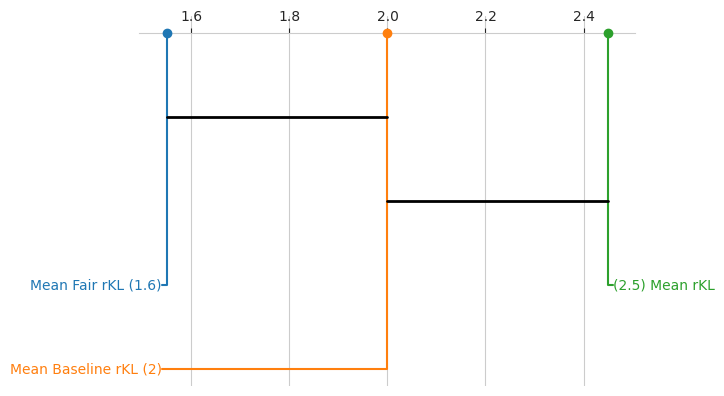

In [129]:
import scikit_posthocs as sp

#mae_df_transposed = rkl_1_data.transpose()
#set the first row as the column names
#mae_df_transposed.columns = mae_df_transposed.iloc[0]
#drop the first row
#mae_df_transposed = mae_df_transposed.drop(mae_df_transposed.index[0])
# Perform Nemenyi post-hoc test

# Perform Nemenyi post-hoc test
nemenyi_results = sp.posthoc_nemenyi_friedman(rkl_1_data[['Mean rKL', 'Mean Fair rKL', 'Mean Baseline rKL']])

ranks = rkl_1_data.drop(['iterations'], axis=1).rank(axis=1, method='min')

# Calculate the average rank for each method
average_ranks = ranks.mean(axis=0)

sp.critical_difference_diagram(average_ranks, nemenyi_results)

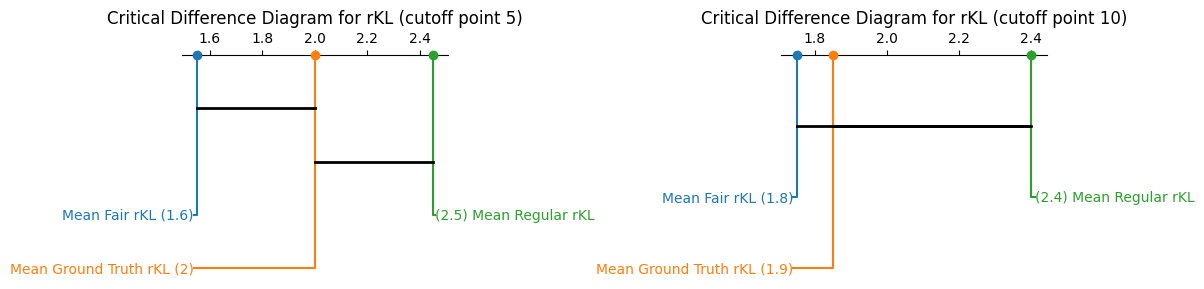

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import scikit_posthocs as sp
import pandas as pd

# Sample data generation for two different Nemenyi tests (replace this with actual data)
np.random.seed(0)  # For reproducibility

# Generate sample data for two different datasets
rkl_5_data = data[['iterations', 'mean_rkl_5', 'mean_fair_rkl_5', 'mean_baseline_rkl_5']].rename(columns={"mean_rkl_5": "Mean Regular rKL", "mean_fair_rkl_5": "Mean Fair rKL", "mean_baseline_rkl_5": "Mean Ground Truth rKL"})

rkl_10_data = data[['iterations', 'mean_rkl_10', 'mean_fair_rkl_10', 'mean_baseline_rkl_10']].rename(columns={"mean_rkl_10": "Mean Regular rKL", "mean_fair_rkl_10": "Mean Fair rKL", "mean_baseline_rkl_10": "Mean Ground Truth rKL"})

# Perform Nemenyi post-hoc test for the first dataset
nemenyi_results_1 = sp.posthoc_nemenyi_friedman(rkl_5_data[['Mean Regular rKL', 'Mean Fair rKL', 'Mean Ground Truth rKL']])
ranks_1 = rkl_5_data.drop(['iterations'], axis=1).rank(axis=1, method='min')
average_ranks_1 = ranks_1.mean(axis=0)

# Perform Nemenyi post-hoc test for the second dataset
nemenyi_results_2 = sp.posthoc_nemenyi_friedman(rkl_10_data[['Mean Regular rKL', 'Mean Fair rKL', 'Mean Ground Truth rKL']])
ranks_2 = rkl_10_data.drop(['iterations'], axis=1).rank(axis=1, method='min')
average_ranks_2 = ranks_2.mean(axis=0)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 3))

# Critical difference diagram for the first dataset
sp.critical_difference_diagram(average_ranks_1, nemenyi_results_1, ax=axs[0])
axs[0].set_title('Critical Difference Diagram for rKL (cutoff point 5)')

# Critical difference diagram for the second dataset
sp.critical_difference_diagram(average_ranks_2, nemenyi_results_2, ax=axs[1])
axs[1].set_title('Critical Difference Diagram for rKL (cutoff point 10)')

# Adjust layout and show plot
plt.tight_layout()
plt.savefig('images/nemenyi_posthoc_tests.png', bbox_inches='tight', dpi=300)
plt.show()


In [130]:
ranks

,Mean rKL,Mean Fair rKL,Mean Baseline rKL
0,1.0,2.0,3.0
1,1.0,3.0,2.0
2,1.0,2.0,3.0
3,1.0,2.0,3.0
4,1.0,2.0,3.0
5,2.0,1.0,3.0
6,3.0,2.0,1.0
7,3.0,1.0,2.0
8,3.0,1.0,2.0
9,3.0,1.0,2.0


É depois que passa da 5 iteração, 0.25 premium ratio. Mesmo com o premium ganhando mais vezes. Pois o rKL tem o cutoff point de 10.

Quando o cutoff point é 5. Os efeitos são sentidos antes com 0.22 de premium ratio. Com 0.25 ainda tem um melhor rRL que o ground truth.

In [40]:
import pandas as pd

data= pd.read_csv('data/data_fair-v3-incr-100-score_new_rkl.csv', header=0)

In [38]:
data = data.groupby(['order', 'cluster']).size().reset_index(name='counts')

In [41]:
def calculate_range_per_chunk(data, chunk_size=20000):
    # Split the DataFrame into chunks of chunk_size rows
    chunks = [data.iloc[i:i + chunk_size] for i in range(0, data.shape[0], chunk_size)]
    count = 1
    data_meta = None
    # Process each chunk
    for chunk in chunks:
        if len(chunk) != 20000:
            continue
        value_counts_df = chunk.groupby(['order', 'cluster']).size().reset_index(name='counts')
        value_counts_df = value_counts_df['cluster'].value_counts()
        counts = value_counts_df.to_list()
        print(f"---------count {count}-----------")
        i = 0
        meta_dict = {}
        for cluster in value_counts_df.index.to_list():
            print(f"{cluster} ----> {counts[i]}")
            print(f"Mean price: {chunk[(chunk['rank'] == 1) & (chunk['cluster'] == cluster)]['price'].mean()}")
            print(f"Mean price fair: {chunk[(chunk['fair_rank'] == 1) & (chunk['cluster'] == cluster)]['price'].mean()}")
            print(f"Mean price baseline: {chunk[(chunk['rank_baseline'] == 1) & (chunk['cluster'] == cluster)]['price'].mean()}")
            print(f"Mean delivery time: {chunk[(chunk['rank'] == 1) & (chunk['cluster'] == cluster)]['delivery_time'].mean()}")
            print(f"Mean delivery time fair: {chunk[(chunk['fair_rank'] == 1) & (chunk['cluster'] == cluster)]['delivery_time'].mean()}")
            print(f"Mean delivery time baseline: {chunk[(chunk['rank_baseline'] == 1) & (chunk['cluster'] == cluster)]['delivery_time'].mean()}")
            #---------------------------------------
            meta_dict[f'mean_price_{cluster}'] = [chunk[(chunk['rank'] == 1) & (chunk['cluster'] == cluster)]['price'].mean()]
            meta_dict[f'mean_price_fair_{cluster}'] = [chunk[(chunk['fair_rank'] == 1) & (chunk['cluster'] == cluster)]['price'].mean()]
            meta_dict[f'mean_price_baseline_{cluster}'] = [chunk[(chunk['rank_baseline'] == 1) & (chunk['cluster'] == cluster)]['price'].mean()]
            meta_dict[f'mean_delivery_time_{cluster}'] = [chunk[(chunk['rank'] == 1) & (chunk['cluster'] == cluster)]['delivery_time'].mean()]
            meta_dict[f'mean_delivery_time_fair_{cluster}'] = [chunk[(chunk['fair_rank'] == 1) & (chunk['cluster'] == cluster)]['delivery_time'].mean()]
            meta_dict[f'mean_delivery_time_baseline_{cluster}'] = [chunk[(chunk['rank_baseline'] == 1) & (chunk['cluster'] == cluster)]['delivery_time'].mean()]
            meta_dict['count'] = [count]
            i += 1
        if data_meta is None:
            data_meta = pd.DataFrame.from_dict(meta_dict)
        else:
            aux_data = pd.DataFrame.from_dict(meta_dict)
            data_meta.set_index('count')
            aux_data.set_index('count')
            data_meta = pd.concat([data_meta, aux_data])
        count += 1
    return data_meta
        
data_meta = calculate_range_per_chunk(data)

---------count 1-----------
5 ----> 257
Mean price: 0.8605363101326693
Mean price fair: 0.23267782354050817
Mean price baseline: 0.8810108109378308
Mean delivery time: 0.7145616956881573
Mean delivery time fair: 0.372309010723417
Mean delivery time baseline: 0.7160723390422271
0 ----> 208
Mean price: 0.7676598905613858
Mean price fair: 0.5443466991501724
Mean price baseline: 0.7971314194564502
Mean delivery time: 0.8959331203950569
Mean delivery time fair: 0.7980969374050171
Mean delivery time baseline: 0.913377904776448
3 ----> 182
Mean price: 0.747138083240722
Mean price fair: 0.5652408763471811
Mean price baseline: 0.7914941407402947
Mean delivery time: 0.8429879178215036
Mean delivery time fair: 0.7404673846950407
Mean delivery time baseline: 0.8346704019693238
1 ----> 157
Mean price: 0.8660822163673602
Mean price fair: 0.5483760375281839
Mean price baseline: 0.8938306259189416
Mean delivery time: 0.7453617789912668
Mean delivery time fair: 0.6496587832062533
Mean delivery time bas

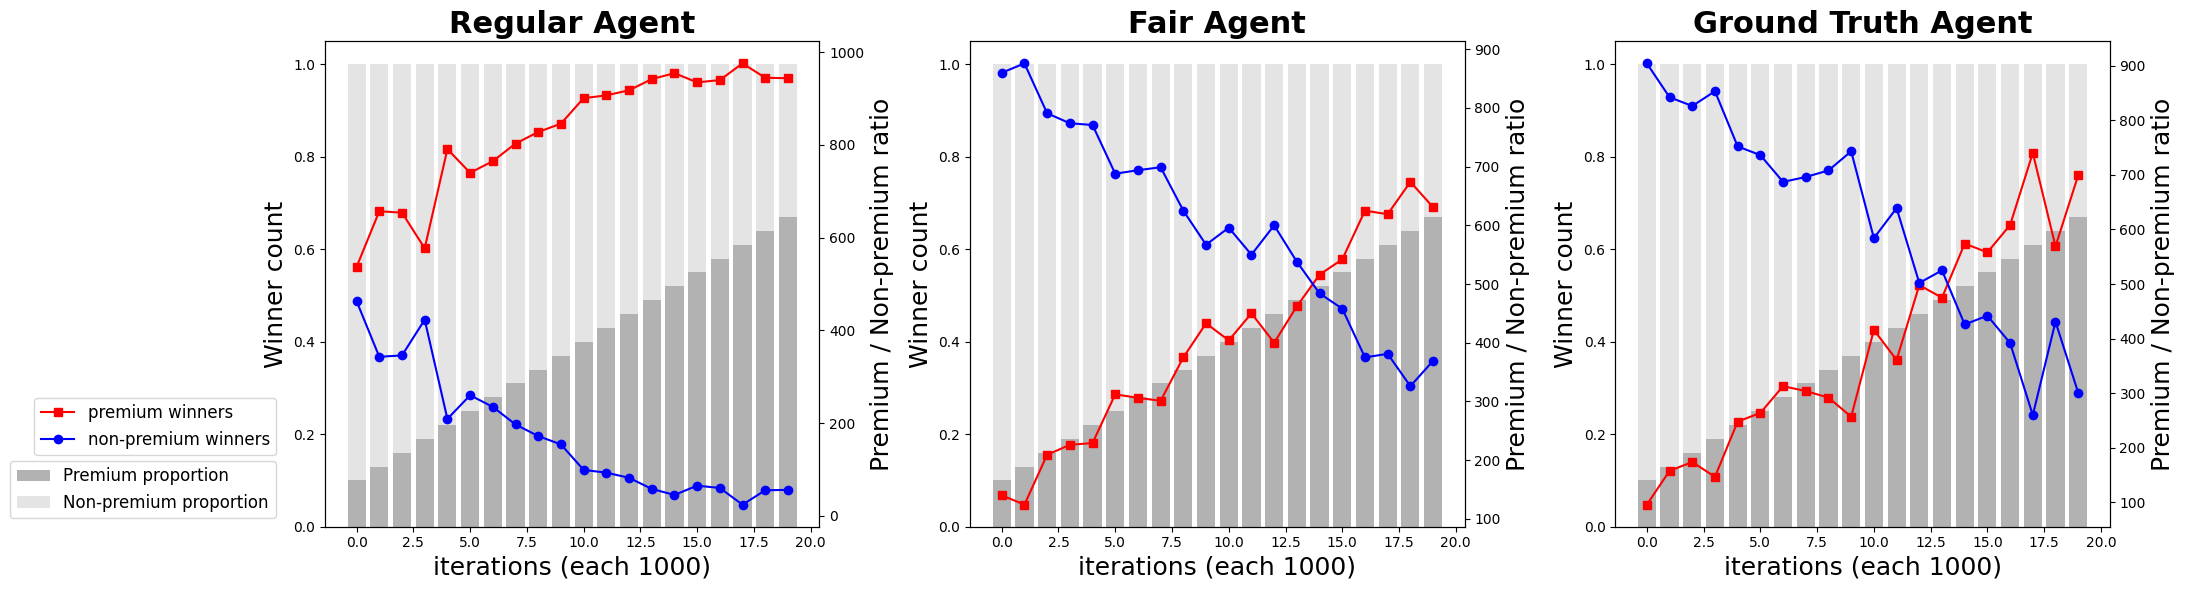

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data= pd.read_csv('data/tradeoff_data-v3-incr-100-score_new_rkl.csv', header=0)
# Sample data (you should replace these with your actual data)
iterations = data['iterations']
premium_winners_regular = data['premium_winners']
non_premium_winners_regular = 1000 - premium_winners_regular
premium_proportion_regular = data['premium_ratio']
non_premium_proportion_regular = 1 - premium_proportion_regular

premium_winners_fair = data['fair_premium_winners']
non_premium_winners_fair = 1000 - premium_winners_fair
premium_proportion_fair = data['premium_ratio']
non_premium_proportion_fair = 1 - premium_proportion_fair

premium_winners_baseline = data['baseline_premium_winners']
non_premium_winners_baseline = 1000 - premium_winners_baseline
premium_proportion_baseline = data['premium_ratio']
non_premium_proportion_baseline = 1 - premium_proportion_baseline

fig, axs = plt.subplots(1, 3, figsize=(22, 6))

# First plot (Regular Agent)
ax1 = axs[0]
ax1.bar(iterations, premium_proportion_regular, color='grey', alpha=0.6, label='Premium proportion')
ax1.bar(iterations, non_premium_proportion_regular, color='lightgrey', alpha=0.6, label='Non-premium proportion', bottom=premium_proportion_regular)
ax1.set_xlabel('iterations (each 1000)', fontsize=18)
ax1.set_ylabel('Winner count', fontsize=18)
ax1.set_title('Regular Agent', fontsize=22, fontweight='bold')

ax2 = ax1.twinx()
ax2.plot(iterations, premium_winners_regular, 's-', color='red', label='premium winners')
ax2.plot(iterations, non_premium_winners_regular, 'o-', color='blue', label='non-premium winners')
ax2.set_ylabel('Premium / Non-premium ratio', fontsize=18)

ax2.legend(loc='lower left', bbox_to_anchor=(-0.605, 0.13), fontsize=12)
ax1.legend(loc='lower left', bbox_to_anchor=(-0.654, 0), fontsize=12)

# Second plot (Fair Agent)
ax1 = axs[1]
ax1.bar(iterations, premium_proportion_fair, color='grey', alpha=0.6, label='Premium proportion')
ax1.bar(iterations, non_premium_proportion_fair, color='lightgrey', alpha=0.6, label='Non-premium proportion', bottom=premium_proportion_fair)
ax1.set_xlabel('iterations (each 1000)', fontsize=18)
ax1.set_ylabel('Winner count', fontsize=18)
ax1.set_title('Fair Agent', fontsize=22, fontweight='bold')
#ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(iterations, premium_winners_fair, 's-', color='red', label='premium winners')
ax2.plot(iterations, non_premium_winners_fair, 'o-', color='blue', label='non-premium winners')
ax2.set_ylabel('Premium / Non-premium ratio', fontsize=18)
#ax2.legend(loc='upper right')

# Third plot (Fair Agent)
ax1 = axs[2]
ax1.bar(iterations, premium_proportion_fair, color='grey', alpha=0.6, label='Premium proportion')
ax1.bar(iterations, non_premium_proportion_fair, color='lightgrey', alpha=0.6, label='Non-premium proportion', bottom=premium_proportion_fair)
ax1.set_xlabel('iterations (each 1000)', fontsize=18)
ax1.set_ylabel('Winner count', fontsize=18)
ax1.set_title('Ground Truth Agent', fontsize=22, fontweight='bold')
#ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(iterations, premium_winners_baseline, 's-', color='red', label='premium winners')
ax2.plot(iterations, non_premium_winners_baseline, 'o-', color='blue', label='non-premium winners')
ax2.set_ylabel('Premium / Non-premium ratio', fontsize=18)
#ax2.legend(loc='upper right')

plt.tight_layout()
plt.savefig("images/proportions.png", bbox_inches='tight', dpi=300)


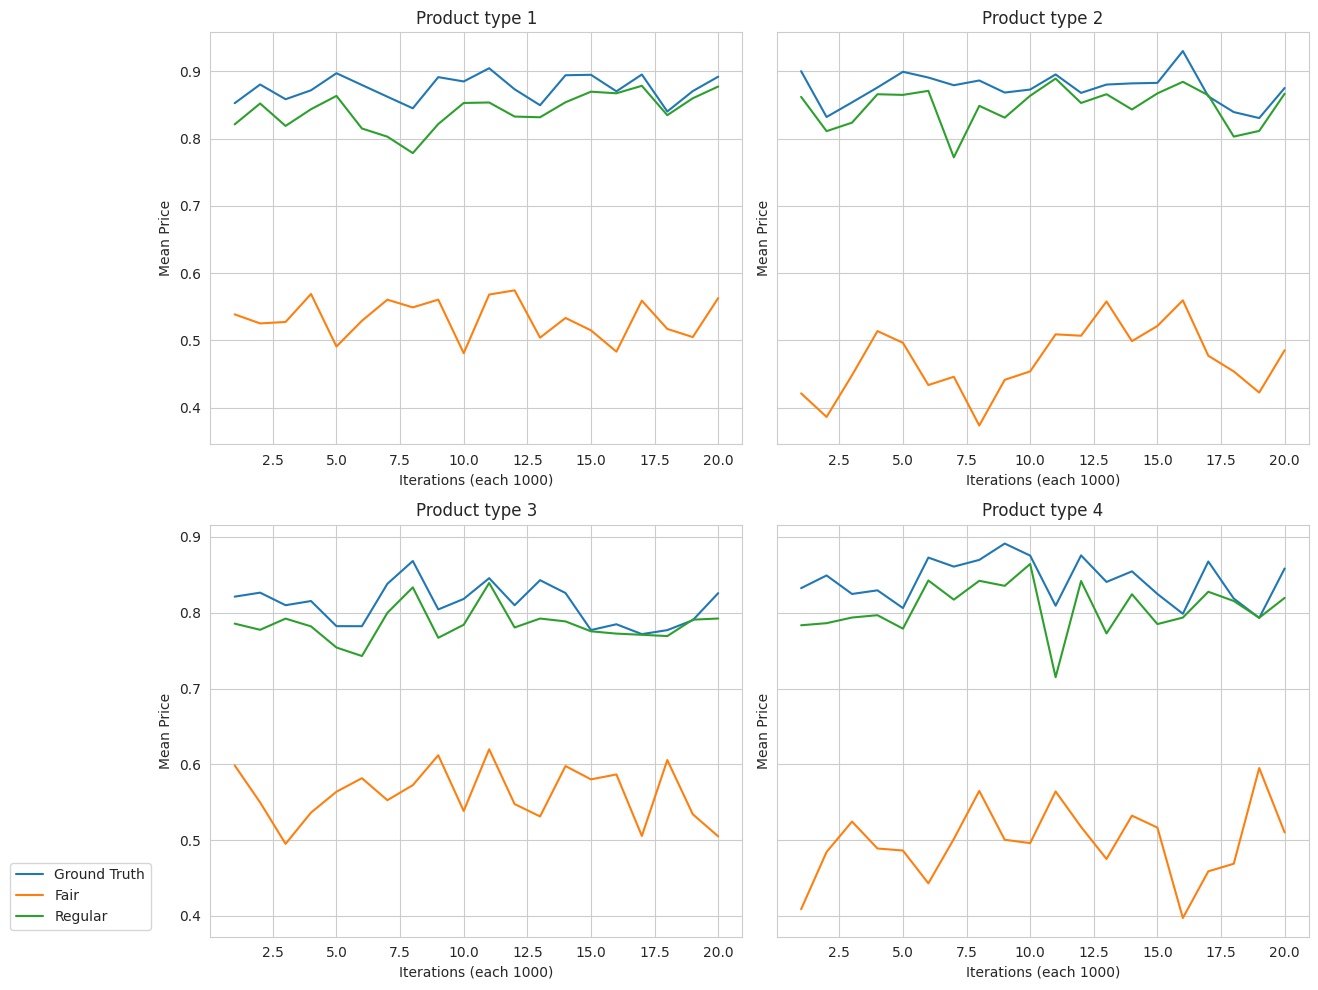

In [163]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data= pd.read_csv('data/iterations_v3_diffs.csv', header=0)

# Sample data generation
np.random.seed(0)  # For reproducibility

time_points = data['count'].astype(int).tolist()
clusters = ['1', '2', '3', '4', '5']
algorithms = ['Ground Truth', 'Fair', 'Regular']

algo_dict = {
    'Ground Truth': 'baseline',
    'Fair': 'fair',
}

# Generate random mean prices for each algorithm in each cluster over time
mean_prices = {
    cluster: {
        algorithm: data[f'mean_price_{cluster}'].tolist() if algorithm == 'Regular' else data[f'mean_price_{algo_dict[algorithm]}_{cluster}']
        for algorithm in algorithms
    }
    for cluster in clusters
}

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(13, 10), sharex='row', sharey='row')
axs = axs.flatten()

for idx, cluster in enumerate(clusters[:4]):
    ax = axs[idx]
    if idx == 3:
        idx = 4
    for algorithm in algorithms:
        ax.plot(time_points, mean_prices[cluster][algorithm], label=algorithm)
    ax.set_title(f'Product type {cluster}')
    ax.set_xlabel('Iterations (each 1000)')
    ax.set_ylabel('Mean Price')
    if idx == 2:
        ax.legend(loc='lower left', bbox_to_anchor=(-0.39, 0))

# Remove any empty subplots
for ax in axs[len(clusters):]:
    fig.delaxes(ax)

# Adjust layout and show plot
plt.tight_layout()
plt.savefig('mean_price_over_time.png', bbox_inches='tight', dpi=300)
plt.show()

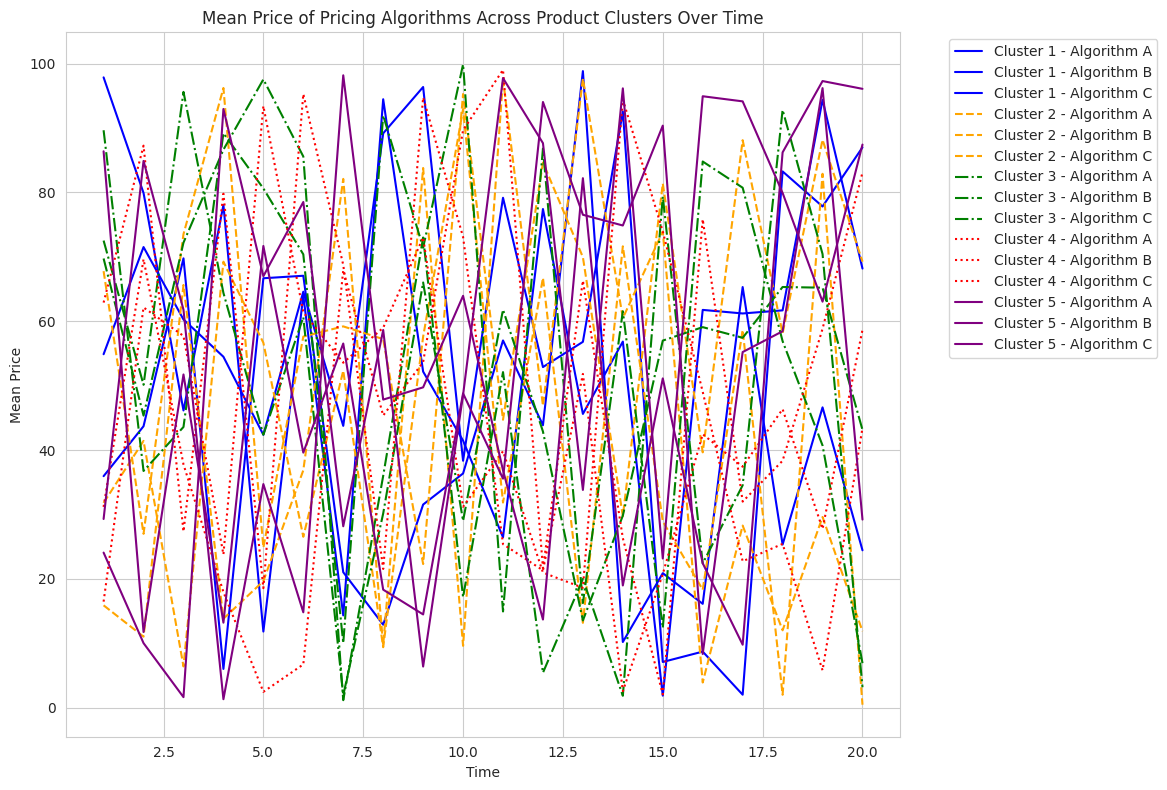

In [149]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data generation
np.random.seed(0)  # For reproducibility

time_points = np.arange(1, 21)
clusters = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']
algorithms = ['Algorithm A', 'Algorithm B', 'Algorithm C']

# Generate random mean prices for each algorithm in each cluster over time
mean_prices = {
    cluster: {
        algorithm: np.random.rand(20) * 100  # Random prices between 0 and 100
        for algorithm in algorithms
    }
    for cluster in clusters
}

# Define colors and line styles for each algorithm and cluster
colors = ['blue', 'orange', 'green', 'red', 'purple']
line_styles = ['-', '--', '-.', ':', '-']

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

for idx, cluster in enumerate(clusters):
    for algorithm in algorithms:
        label = f'{cluster} - {algorithm}'
        ax.plot(time_points, mean_prices[cluster][algorithm],
                label=label, color=colors[idx], linestyle=line_styles[idx])

# Set labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Mean Price')
ax.set_title('Mean Price of Pricing Algorithms Across Product Clusters Over Time')

# Add legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.savefig('mean_price_combined.png', bbox_inches='tight', dpi=300)
plt.show()

In [35]:
data_meta.to_csv('data/iterations_v3_diffs.csv', header=True, index=True)

{'markers': [<matplotlib.collections.PathCollection at 0x7f3014364340>,
 'elbows': [<matplotlib.lines.Line2D at 0x7f30143640a0>,
 'labels': [Text(1.24, -1, 'mean_delivery_time_baseline_5 (1.2)'),
  Text(1.24, -2, 'mean_delivery_time_5 (1.8)'),
  Text(3.01, -1, '(3) mean_delivery_time_fair_5')],
 'crossbars': []}

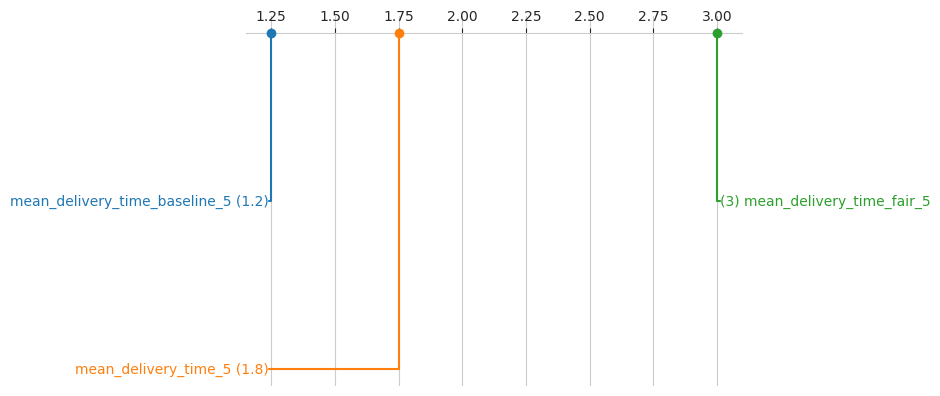

In [42]:
import scikit_posthocs as sp

#mae_df_transposed = rkl_1_data.transpose()
#set the first row as the column names
#mae_df_transposed.columns = mae_df_transposed.iloc[0]
#drop the first row
#mae_df_transposed = mae_df_transposed.drop(mae_df_transposed.index[0])
# Perform Nemenyi post-hoc test

# Perform Nemenyi post-hoc test
nemenyi_results = sp.posthoc_nemenyi_friedman(data_meta[['mean_delivery_time_5', 'mean_delivery_time_fair_5', 'mean_delivery_time_baseline_5']])

ranks = data_meta[['mean_delivery_time_5', 'mean_delivery_time_fair_5', 'mean_delivery_time_baseline_5']].rank(axis=1, method='min', ascending=False)

# Calculate the average rank for each method
average_ranks = ranks.mean(axis=0)

sp.critical_difference_diagram(average_ranks, nemenyi_results)

In [41]:
data = data['cluster'].value_counts()

In [46]:
data.index.to_list()
data.to_list()

[4575, 4285, 4023, 3156, 2321, 1641]

In [7]:
average_ranks

mean_delivery_time             1.8
mean_fair_delivery_time        3.0
mean_baseline_delivery_time    1.2
dtype: float64

In [8]:
ranks

,mean_delivery_time,mean_fair_delivery_time,mean_baseline_delivery_time
0,2.0,3.0,1.0
1,2.0,3.0,1.0
2,2.0,3.0,1.0
3,2.0,3.0,1.0
4,2.0,3.0,1.0
5,2.0,3.0,1.0
6,1.0,3.0,2.0
7,1.0,3.0,2.0
8,2.0,3.0,1.0
9,2.0,3.0,1.0


In [145]:
nemenyi_results

,mean_rkl_1,mean_fair_rkl_1
mean_rkl_1,1.000,0.001
mean_fair_rkl_1,0.001,1.000


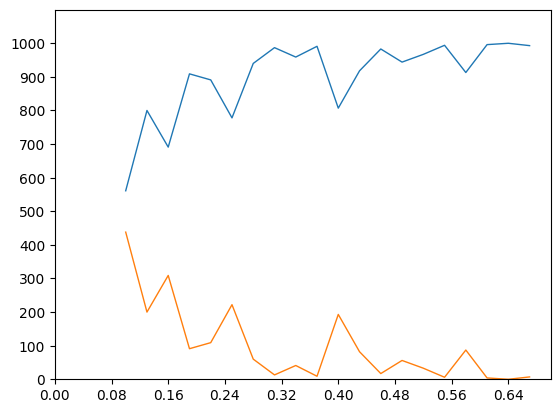

In [136]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

# plot
fig, ax = plt.subplots()

ax.plot(data['premium_ratio'], data['premium_winners'], linewidth=1.0)
ax.plot(data['premium_ratio'], data['non_premium_winners'], linewidth=1.0)

ax.set(xlim=(0.1, 0.7), xticks=np.arange(0, 0.1, 1),
       ylim=(0, 1100), yticks=np.arange(0, 1100, 100))
ax.set_facecolor("white")

ax.xaxis.set_major_locator(MaxNLocator(nbins=10, integer=False))

plt.show()

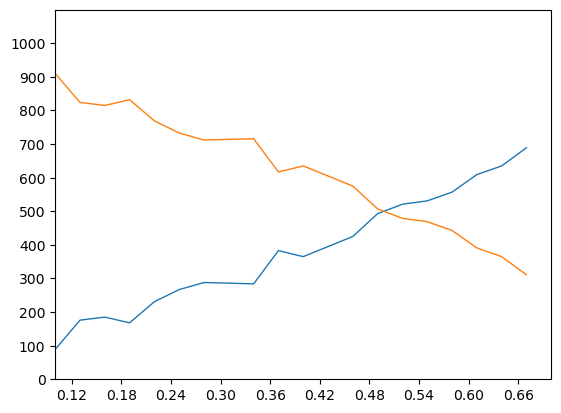

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

# plot
fig, ax = plt.subplots()

ax.plot(data['premium_ratio'], data['fair_premium_winners'], linewidth=1.0, )
ax.plot(data['premium_ratio'], data['fair_non_premium_winners'], linewidth=1.0)

ax.set(xlim=(0.1, 0.7), xticks=np.arange(0, 0.1, 1),
       ylim=(0, 1100), yticks=np.arange(0, 1100, 100))

ax.xaxis.set_major_locator(MaxNLocator(nbins=10, integer=False))

plt.show()

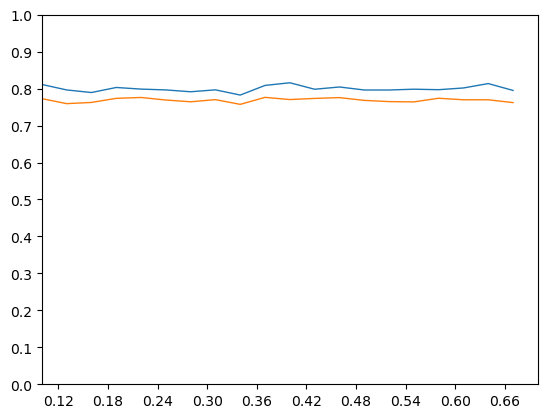

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

# plot
fig, ax = plt.subplots()

ax.plot(data['premium_ratio'], data['mean_price'], linewidth=1.0)
ax.plot(data['premium_ratio'], data['mean_fair_price'], linewidth=1.0)

ax.set(xlim=(0.1, 0.7), xticks=np.arange(0, 0.1, 1),
       ylim=(0, 1), yticks=np.arange(0, 0.01, 1))

ax.xaxis.set_major_locator(MaxNLocator(nbins=10, integer=False))
ax.yaxis.set_major_locator(MaxNLocator(nbins=10, integer=False))

plt.show()

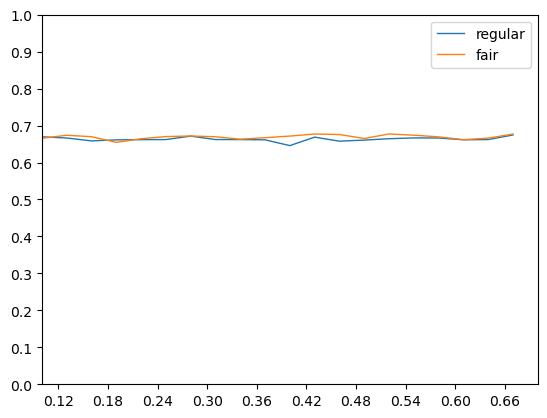

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

# plot
fig, ax = plt.subplots()

ax.plot(data['premium_ratio'], data['mean_delivery_time'], label='regular', linewidth=1.0)
ax.plot(data['premium_ratio'], data['mean_fair_delivery_time'], label='fair', linewidth=1.0)

ax.set(xlim=(0.1, 0.7), xticks=np.arange(0, 0.1, 1),
       ylim=(0, 1), yticks=np.arange(0, 0.01, 1))

ax.xaxis.set_major_locator(MaxNLocator(nbins=10, integer=False))
ax.yaxis.set_major_locator(MaxNLocator(nbins=10, integer=False))
leg = plt.legend(loc='upper right')

plt.show()

In [40]:
import pandas as pd

data= pd.read_csv('data/tradeoff_data-v2-imp-2-incr.csv', header=0)

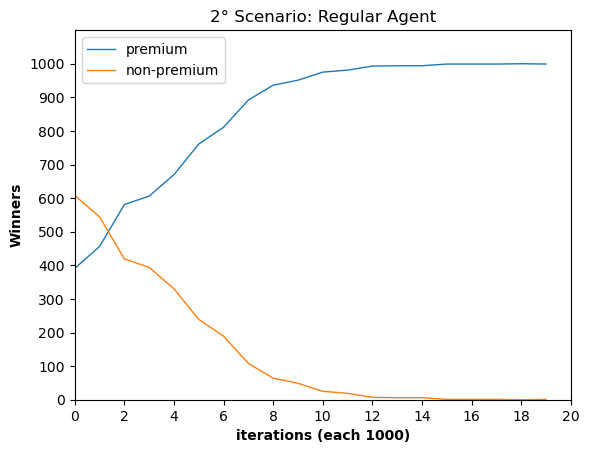

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

# plot
fig, ax = plt.subplots()

ax.plot(data['Unnamed: 0'], data['premium_winners'], label='premium', linewidth=1.0)
ax.plot(data['Unnamed: 0'], data['non_premium_winners'], label='non-premium', linewidth=1.0)

ax.set(xlim=(0, 20), xticks=np.arange(0, 1, 20),
       ylim=(0, 1100), yticks=np.arange(0, 1100, 100))
ax.set_facecolor("white")
leg = plt.legend(loc='upper left')

plt.xlabel("iterations (each 1000)", fontweight='bold')
plt.ylabel("Winners", fontweight='bold')

plt.title("2° Scenario: Regular Agent")

ax.xaxis.set_major_locator(MaxNLocator(nbins=10, integer=False))

plt.savefig("figures/2sce-winners.png")

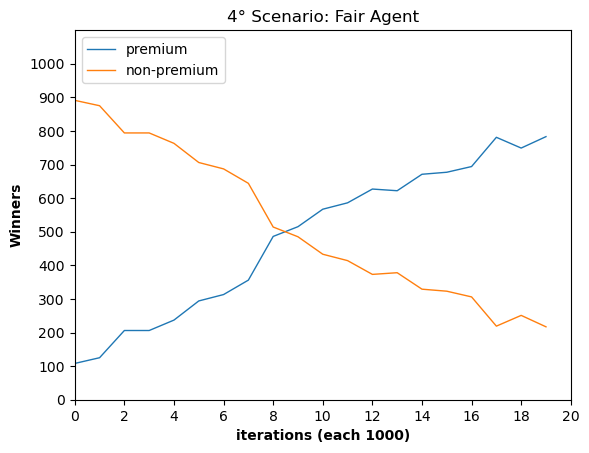

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

# plot
fig, ax = plt.subplots()

ax.plot(data['Unnamed: 0'], data['fair_premium_winners'], label="premium", linewidth=1.0)
ax.plot(data['Unnamed: 0'], data['fair_non_premium_winners'], label="non-premium", linewidth=1.0)

ax.set(xlim=(0, 20), xticks=np.arange(0, 1, 20),
       ylim=(0, 1100), yticks=np.arange(0, 1100, 100))
ax.set_facecolor("white")

plt.xlabel("iterations (each 1000)", fontweight='bold')
plt.ylabel("Winners", fontweight='bold')
leg = plt.legend(loc='upper left')

plt.title("4° Scenario: Fair Agent")

ax.xaxis.set_major_locator(MaxNLocator(nbins=10, integer=False))

plt.savefig("figures/4sce-winners-fair.png")

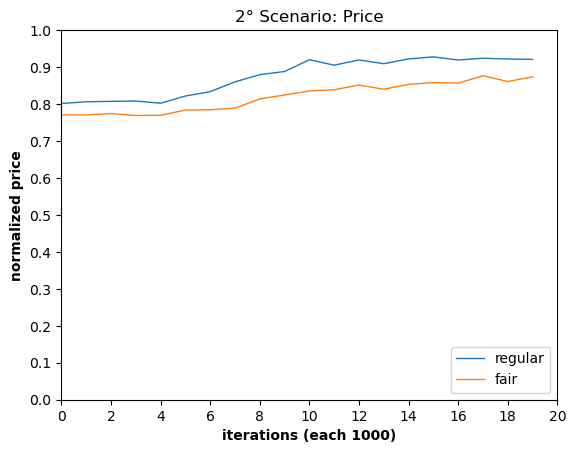

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

# plot
fig, ax = plt.subplots()

ax.plot(data['Unnamed: 0'], data['mean_price'], label='regular', linewidth=1.0)
ax.plot(data['Unnamed: 0'], data['mean_fair_price'], label='fair', linewidth=1.0)

ax.set(xlim=(0, 20), xticks=np.arange(0, 1, 20),
       ylim=(0, 1), yticks=np.arange(0, 0.1, 1))
ax.set_facecolor("white")
leg = plt.legend(loc='lower right')

plt.xlabel("iterations (each 1000)", fontweight='bold')
plt.ylabel("normalized price", fontweight='bold')

ax.xaxis.set_major_locator(MaxNLocator(nbins=10, integer=True))
ax.yaxis.set_major_locator(MaxNLocator(nbins=10, integer=False))
plt.title("2° Scenario: Price")

ax.xaxis.set_major_locator(MaxNLocator(nbins=10, integer=True))
ax.yaxis.set_major_locator(MaxNLocator(nbins=10, integer=False))

plt.savefig("figures/4sce-price.png")

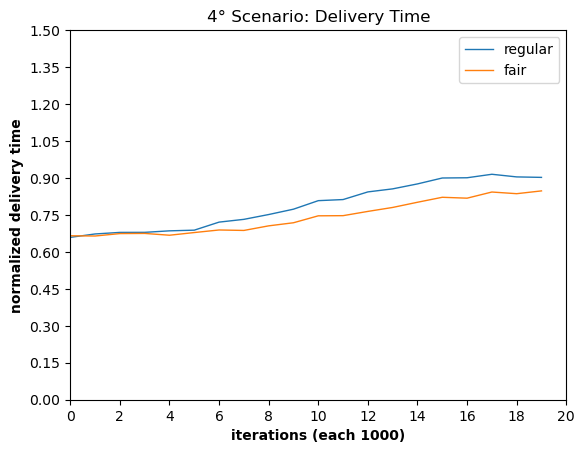

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

# plot
fig, ax = plt.subplots()

ax.plot(data['Unnamed: 0'], data['mean_delivery_time'], label='regular', linewidth=1.0)
ax.plot(data['Unnamed: 0'], data['mean_fair_delivery_time'], label='fair', linewidth=1.0)

ax.set(xlim=(0, 20), xticks=np.arange(0, 1, 20),
       ylim=(0, 1.5), yticks=np.arange(0, 0.1, 1.5))
ax.set_facecolor("white")
leg = plt.legend(loc='upper right')

plt.xlabel("iterations (each 1000)", fontweight='bold')
plt.ylabel("normalized delivery time", fontweight='bold')

ax.xaxis.set_major_locator(MaxNLocator(nbins=10, integer=True))
ax.yaxis.set_major_locator(MaxNLocator(nbins=10, integer=False))
plt.title("4° Scenario: Delivery Time")

plt.savefig("figures/4sce-delivery.png")